Connected to churn-ml-env (Python 3.10.18)

In [ ]:
"""
Interactive Training Data Loading and Exploration Tool for Churn Analysis

This interactive script provides comprehensive training data exploration capabilities for
churn prediction model development. It leverages the SnowTrainDataLoader class
to load, process, and analyze training customer data from Snowflake with real-time
exploration capabilities suitable for data scientists and analysts.

✅ Key Features:
- Interactive data loading from Snowflake with progress tracking
- Real-time exploration of time series and static features
- Feature engineering dataset creation for ML models
- Comprehensive churn pattern analysis and visualization
- Customer segmentation and lifecycle analysis
- No file outputs - purely interactive console exploration
- Memory-efficient processing with detailed metrics

📊 Data Processing Pipeline:
- Raw data ingestion from Snowflake with validation
- Usage data processing with 2023 H1 imputation
- Time series feature extraction at weekly granularity
- Static feature aggregation and transformation
- Feature engineering dataset creation with DAYS_TO_CHURN

🔍 Analysis Capabilities:
- Customer churn distribution and statistics
- Time series usage pattern exploration
- Segment-wise customer behavior analysis
- Feature completeness and quality checks
- ML compatibility verification

📝 Interactive Exploration:
- Real-time data inspection with pandas DataFrames
- Detailed logging of processing steps
- Memory usage and performance metrics
- Sample data display for validation
- Comprehensive feature descriptions

💡 Usage:
Run interactively in Jupyter notebook or Python console:
python test_train_manual.py

Or use with IPython for cell-by-cell execution

Updated: 2025-08-14
- Enhanced with feature engineering dataset creation
- Added comprehensive churn dynamics analysis
- Integrated ML compatibility checking
- Improved interactive exploration capabilities
"""
# -----------------------------------------------------------------------------
# * Author: Evgeni Nikolaev
# * Emails: evgeni.nikolaev@ricoh-usa.com
# -----------------------------------------------------------------------------
# * UPDATED ON: 2025-08-19
# * CREATED ON: 2025-08-14
# -----------------------------------------------------------------------------
# COPYRIGHT @ 2025 Ricoh. All rights reserved.
# The information contained herein is copyright and proprietary to
# Ricoh and may not be reproduced, disclosed, or used in
# any manner without prior written permission from Ricoh.
# -----------------------------------------------------------------------------

'\nInteractive Training Data Loading and Exploration Tool for Churn Analysis\n\nThis interactive script provides comprehensive training data exploration capabilities for\nchurn prediction model development. It leverages the SnowTrainDataLoader class\nto load, process, and analyze training customer data from Snowflake with real-time\nexploration capabilities suitable for data scientists and analysts.\n\n✅ Key Features:\n- Interactive data loading from Snowflake with progress tracking\n- Real-time exploration of time series and static features\n- Feature engineering dataset creation for ML models\n- Comprehensive churn pattern analysis and visualization\n- Customer segmentation and lifecycle analysis\n- No file outputs - purely interactive console exploration\n- Memory-efficient processing with detailed metrics\n\n📊 Data Processing Pipeline:\n- Raw data ingestion from Snowflake with validation\n- Usage data processing with 2023 H1 imputation\n- Time series feature extraction at weekly gr

In [ ]:
import pandas as pd
import numpy as np
from hydra import initialize_config_dir, compose
from hydra.core.global_hydra import GlobalHydra

In [ ]:
# Import required modules
from churn_aiml.data.db.snowflake.loaddata import SnowTrainDataLoader
from churn_aiml.loggers.loguru.config import setup_logger_for_script, get_logger
from churn_aiml.utils.find_paths import ProjectRootFinder
from churn_aiml.visualization.churn_plots.churn_lifecycle import ChurnLifecycleVizSnowflake
from churn_aiml.utils.profiling import timer

In [ ]:
# Setup paths
churn_aiml_dir = ProjectRootFinder().find_path()
conf_dir = churn_aiml_dir / "conf"
print(f"Config path: {conf_dir}")

Config path: /home/applaimlgen/ricoh_aiml/conf


In [ ]:
# Clear and initialize Hydra configuration
GlobalHydra.instance().clear()
with initialize_config_dir(config_dir=str(conf_dir), version_base=None):
    cfg = compose(config_name="config")

In [ ]:
# Setup logger with local directory for logs
logger_config = setup_logger_for_script(cfg, __file__)
logger = get_logger()
logger.info("=" * 80)
logger.info("Starting Manual Training Data Loading Example")
logger.info("=" * 80)

# Load and display date configuration
from pathlib import Path
import yaml
dates_config_path = Path('/home/applaimlgen/ricoh_aiml/conf/products/DOCUWARE/db/snowflake/data_config/dates_config.yaml')
if dates_config_path.exists():
    with open(dates_config_path, 'r') as f:
        dates_config = yaml.safe_load(f)

    logger.info("\n📅 Date Configuration:")
    logger.info(f"  Analysis Start Date: {dates_config['analysis_start_date']}")
    logger.info(f"  Data Update Dates:")
    for update in dates_config['data_update_dates']:
        logger.info(f"    - {update['date']}: {update['label']}")
    logger.info("  ℹ️ Only contracts starting >= 2020-01-01 will be included")
    logger.info("  ℹ️ Red dashed lines in time series plots indicate data update dates")

✅ Found loguru config at: loggers.loguru
📝 Log file created at: /home/applaimlgen/ricoh_aiml/demo/products/01_DOCUWARE/01_SNOWFLAKE/04_data_loading/01_train_data/01_manual_hydra/logs/loguru/20250819/pm-08-13-46.log
20:13:46 | INFO     | __main__ | ================================================================================
20:13:46 | INFO     | __main__ | Starting Manual Training Data Loading Example
20:13:46 | INFO     | __main__ | ================================================================================
20:13:46 | INFO     | __main__ | 
📅 Date Configuration:
20:13:46 | INFO     | __main__ |   Analysis Start Date: 2020-01-01


20:13:46 | INFO     | __main__ |   Data Update Dates:
20:13:46 | INFO     | __main__ |     - 2025-07-02: July Update
20:13:46 | INFO     | __main__ |     - 2025-08-04: August Update
20:13:46 | INFO     | __main__ |     - 2025-08-19: Latest Update
20:13:46 | INFO     | __main__ |   ℹ️ Only contracts starting >= 2020-01-01 will be included
20:13:46 | INFO     | __main__ |   ℹ️ Red dashed lines in time series plots indicate data update dates
20:13:47 | INFO     | __main__ | 
Initializing SnowTrainDataLoader
20:13:47 | INFO     | churn_aiml.data.db.snowflake.loaddata | Initialized SnowTrainDataLoader for environment: development
20:13:47 | INFO     | churn_aiml.data.db.snowflake.loaddata | Using analysis start date: 2020-01-01 00:00:00
20:13:47 | INFO     | churn_aiml.ml.datetime.iso_converters | Initialized ISOWeekDateConverter with log_operations=False
20:13:47 | INFO     | churn_aiml.ml.datetime.iso_converters | Initialized WeekMidpointConverter with log_operations=False
20:13:49 | INFO

In [ ]:
# Initialize the data loader
logger.info("\nInitializing SnowTrainDataLoader")
data_loader = SnowTrainDataLoader(config=cfg, environment="development")

In [ ]:
# Load the data
logger.info("Loading training data from Snowflake")
logger.info("This may take several minutes depending on data size...")

In [ ]:
# Load all data
with timer():
    data_dict = data_loader.load_data()

logger.info("Data loading completed successfully!")
logger.info("=" * 80)

Elapsed: hh:mm:ss 0:00:43.448543


In [ ]:
# Display information about loaded data
print("\n" + "=" * 80)
print("LOADED DATA SUMMARY")
print("=" * 80)

for key, df in data_dict.items():
    if isinstance(df, pd.DataFrame):
        print(f"\n📊 {key}:")
        print(f"   Shape: {df.shape}")
        print(f"   Columns: {', '.join(df.columns[:5])}")
        if len(df.columns) > 5:
            print(f"           ... and {len(df.columns) - 5} more columns")
        print(f"   Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


LOADED DATA SUMMARY

📊 usage_processed:
   Shape: (94886, 15)
   Columns: CUST_ACCOUNT_NUMBER, YYYYWK, CHURN_DATE, CHURNED_FLAG, CONTRACT_NUMBER
           ... and 10 more columns
   Memory: 35.14 MB

📊 merged_data:
   Shape: (134985, 135)
   Columns: CUST_ACCOUNT_NUMBER, RECEIPT_DATE, CASH_RECEIPT_ID, ENTERED_AMOUNT, FUNCTIONAL_AMOUNT
           ... and 130 more columns
   Memory: 327.82 MB

📊 time_series_features:
   Shape: (90173, 7)
   Columns: CUST_ACCOUNT_NUMBER, YYYYWK, DOCUMENTS_OPENED, USED_STORAGE_MB, INVOICE_REVLINE_TOTAL
           ... and 2 more columns
   Memory: 5.68 MB

📊 static_features:
   Shape: (698, 8)
   Columns: CUST_ACCOUNT_NUMBER, PROBABILITY_OF_DELINQUENCY, RICOH_CUSTOM_RISK_MODEL, OVERALL_BUSINESS_RISK, PAYMENT_RISK_TRIPLE_A_RATING
           ... and 3 more columns
   Memory: 0.14 MB

📊 customer_metadata:
   Shape: (698, 6)
   Columns: CUST_ACCOUNT_NUMBER, CUST_PARTY_NAME, CHURNED_FLAG, CHURN_DATE, CUSTOMER_SEGMENT
           ... and 1 more columns
   Memory

In [ ]:
# Explore time series features
if 'time_series_features' in data_dict:
    print("\n" + "=" * 80)
    print("TIME SERIES FEATURES ANALYSIS")
    print("=" * 80)

    ts_data = data_dict['time_series_features']
    print(f"\nTime series data shape: {ts_data.shape}")
    print(f"Unique customers: {ts_data['CUST_ACCOUNT_NUMBER'].nunique()}")
    print(f"Date range: {ts_data['YYYYWK'].min()} to {ts_data['YYYYWK'].max()}")

    print("\nSample of time series data:")
    print(ts_data.head(10).to_string())


TIME SERIES FEATURES ANALYSIS

Time series data shape: (90173, 7)
Unique customers: 533
Date range: 202001 to 202536

Sample of time series data:
   CUST_ACCOUNT_NUMBER  YYYYWK  DOCUMENTS_OPENED  USED_STORAGE_MB  INVOICE_REVLINE_TOTAL  ORIGINAL_AMOUNT_DUE  FUNCTIONAL_AMOUNT
0              2001392  202001               NaN              NaN                    NaN                  NaN                NaN
1              2001392  202002               NaN              NaN                    NaN                  NaN                NaN
2              2001392  202003               NaN              NaN                    NaN                  NaN                NaN
3              2001392  202004               NaN              NaN                    NaN                  NaN                NaN
4              2001392  202005               NaN              NaN                    NaN                  NaN                NaN
5              2001392  202006               NaN              NaN              

In [ ]:
# Explore static features
if 'static_features' in data_dict:
    print("\n" + "=" * 80)
    print("STATIC FEATURES ANALYSIS")
    print("=" * 80)

    static_data = data_dict['static_features']
    print(f"\nStatic features shape: {static_data.shape}")

    # Check for missing values
    missing_counts = static_data.isnull().sum()
    if missing_counts.any():
        print("\nMissing values:")
        for col, count in missing_counts[missing_counts > 0].items():
            pct = (count / len(static_data)) * 100
            print(f"   {col}: {count} ({pct:.1f}%)")

    print("\nData types:")
    print(static_data.dtypes)


STATIC FEATURES ANALYSIS

Static features shape: (698, 8)

Missing values:
   PROBABILITY_OF_DELINQUENCY: 211 (30.2%)
   RICOH_CUSTOM_RISK_MODEL: 96 (13.8%)
   PAYMENT_RISK_TRIPLE_A_RATING: 609 (87.2%)
   LIFESPAN_MONTHS: 565 (80.9%)
   DAYS_TO_CHURN: 565 (80.9%)

Data types:
CUST_ACCOUNT_NUMBER               Int64
PROBABILITY_OF_DELINQUENCY      float64
RICOH_CUSTOM_RISK_MODEL         float64
OVERALL_BUSINESS_RISK            object
PAYMENT_RISK_TRIPLE_A_RATING     object
CONTRACT_LINE_ITEMS              object
LIFESPAN_MONTHS                 float64
DAYS_TO_CHURN                   float64
dtype: object


In [ ]:
# Explore customer metadata
if 'customer_metadata' in data_dict:
    print("\n" + "=" * 80)
    print("CUSTOMER METADATA ANALYSIS")
    print("=" * 80)

    metadata = data_dict['customer_metadata']
    print(f"\nTotal customers: {len(metadata)}")

    # Churn statistics
    if 'CHURNED_FLAG' in metadata.columns:
        churn_stats = metadata['CHURNED_FLAG'].value_counts()
        print("\nChurn distribution:")
        for status, count in churn_stats.items():
            pct = (count / len(metadata)) * 100
            print(f"   {status}: {count} ({pct:.1f}%)")

    # Segment distribution
    if 'CUSTOMER_SEGMENT' in metadata.columns:
        segment_stats = metadata['CUSTOMER_SEGMENT'].value_counts().head(10)
        print("\nTop customer segments:")
        for segment, count in segment_stats.items():
            pct = (count / len(metadata)) * 100
            print(f"   {segment}: {count} ({pct:.1f}%)")

    # Get and display monthly churn distribution here
    print("\n" + "=" * 80)
    print("NUMBER OF CHURNS PER MONTH DISTRIBUTION")
    print("=" * 80)

    churn_dist_metadata = data_loader.get_monthly_churn_distribution()
    if churn_dist_metadata:
        dist_stats_metadata = churn_dist_metadata['distribution_stats']
        print("\nMonthly churn count statistics:")
        print(f"   Mean: {dist_stats_metadata['mean_churns_per_month']:.1f} churns/month")
        print(f"   Median: {dist_stats_metadata['median_churns_per_month']:.1f} churns/month")
        print(f"   Min: {dist_stats_metadata['min_churns_per_month']:.1f} churns/month")
        print(f"   Max: {dist_stats_metadata['max_churns_per_month']:.1f} churns/month")
        print(f"   Std Dev: {dist_stats_metadata['std_churns_per_month']:.1f} churns/month")

        print(f"\nTotal months analyzed: {dist_stats_metadata['total_months']}")
        print(f"Total churned customers: {dist_stats_metadata['total_churned_customers']}")
        print(f"Average monthly churn rate: {(dist_stats_metadata['mean_churns_per_month'] / dist_stats_metadata['total_churned_customers'] * 100):.2f}% of all churned")


CUSTOMER METADATA ANALYSIS

Total customers: 698

Churn distribution:
   0: 385 (55.2%)
   1: 313 (44.8%)

Top customer segments:
   Targeted: 218 (31.2%)
   SMB: 132 (18.9%)
   SLG: 123 (17.6%)
   K-12: 120 (17.2%)
   Enterprise: 51 (7.3%)
   Strategic: 44 (6.3%)
   Internal: 3 (0.4%)
   Federal: 2 (0.3%)
   Commercial Print: 2 (0.3%)

NUMBER OF CHURNS PER MONTH DISTRIBUTION

Monthly churn count statistics:
   Mean: 3.7 churns/month
   Median: 3.0 churns/month
   Min: 1.0 churns/month
   Max: 9.0 churns/month
   Std Dev: 2.4 churns/month

Total months analyzed: 59
Total churned customers: 216
Average monthly churn rate: 1.69% of all churned


In [ ]:
# Get combined training-ready data
print("\n" + "=" * 80)
print("PREPARING TRAINING-READY DATASET")
print("=" * 80)

training_data = data_loader.get_training_ready_data()

if not training_data.empty:
    print(f"\nTraining data shape: {training_data.shape}")
    print(f"Memory usage: {training_data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    # Feature types
    numeric_cols = training_data.select_dtypes(include=[np.number]).columns
    categorical_cols = training_data.select_dtypes(include=['object']).columns

    print(f"\nFeature types:")
    print(f"   Numeric features: {len(numeric_cols)}")
    print(f"   Categorical features: {len(categorical_cols)}")

    # Target variable analysis
    if 'DAYS_TO_CHURN' in training_data.columns:
        days_to_churn = training_data['DAYS_TO_CHURN'].dropna()
        print(f"\nDays to churn statistics:")
        print(f"   Mean: {days_to_churn.mean():.1f} days")
        print(f"   Median: {days_to_churn.median():.1f} days")
        print(f"   Min: {days_to_churn.min():.1f} days")
        print(f"   Max: {days_to_churn.max():.1f} days")

    if 'LIFESPAN_MONTHS' in training_data.columns:
        lifespan = training_data['LIFESPAN_MONTHS'].dropna()
        print(f"\nCustomer lifespan statistics:")
        print(f"   Mean: {lifespan.mean():.1f} months")
        print(f"   Median: {lifespan.median():.1f} months")
        print(f"   Min: {lifespan.min():.1f} months")
        print(f"   Max: {lifespan.max():.1f} months")


PREPARING TRAINING-READY DATASET

Training data shape: (698, 34)
Memory usage: 0.41 MB

Feature types:
   Numeric features: 27
   Categorical features: 6

Days to churn statistics:
   Mean: 424.3 days
   Median: 365.0 days
   Min: 28.0 days
   Max: 1548.0 days

Customer lifespan statistics:
   Mean: 14.1 months
   Median: 12.2 months
   Min: 0.9 months
   Max: 51.6 months


In [ ]:
# Explore aggregated features
if 'aggregated_features' in data_dict:
    print("\n" + "=" * 80)
    print("AGGREGATED FEATURES ANALYSIS")
    print("=" * 80)

    agg_data = data_dict['aggregated_features']
    print(f"\nAggregated features shape: {agg_data.shape}")

    # Usage statistics
    if 'DOCUMENTS_OPENED_sum' in agg_data.columns:
        docs_stats = agg_data['DOCUMENTS_OPENED_sum'].describe()
        print(f"\nTotal documents opened per customer:")
        print(docs_stats.to_string())

    if 'USED_STORAGE_MB_mean' in agg_data.columns:
        storage_stats = agg_data['USED_STORAGE_MB_mean'].describe()
        print(f"\nAverage storage usage per customer (MB):")
        print(storage_stats.to_string())


AGGREGATED FEATURES ANALYSIS

Aggregated features shape: (533, 22)

Total documents opened per customer:
count    5.330000e+02
mean     2.983414e+04
std      1.443380e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.850000e+02
max      1.850099e+06

Average storage usage per customer (MB):
count    3.610000e+02
mean     2.865653e+04
std      1.016667e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.594286e+01
75%      1.093015e+04
max      1.420414e+06


In [ ]:
print("\n" + "=" * 80)
print("DATA QUALITY CHECKS")
print("=" * 80)

# Check for duplicates
for key, df in data_dict.items():
    if isinstance(df, pd.DataFrame) and not df.empty:
        duplicates = df.duplicated().sum()
        if duplicates > 0:
            print(f"⚠️  {key}: {duplicates} duplicate rows found")
        else:
            print(f"✅ {key}: No duplicates")


DATA QUALITY CHECKS
✅ usage_processed: No duplicates
✅ merged_data: No duplicates
✅ time_series_features: No duplicates
✅ static_features: No duplicates
✅ customer_metadata: No duplicates
✅ aggregated_features: No duplicates
✅ combined_features: No duplicates


In [ ]:
# Create and analyze feature engineering dataset
print("\n" + "=" * 80)
print("FEATURE ENGINEERING DATASET CREATION")
print("=" * 80)

logger.info("Creating feature engineering dataset for ML tools")

# Get the feature engineering dataset
fe_dataset = data_loader.get_feature_engineering_dataset()

if not fe_dataset.empty:
    print(f"\n📊 Feature Engineering Dataset Created Successfully!")
    print(f"   Shape: {fe_dataset.shape}")
    print(f"   Customers: {fe_dataset['CUST_ACCOUNT_NUMBER'].nunique()}")
    print(f"   Time range: {fe_dataset['YYYYWK'].min()} to {fe_dataset['YYYYWK'].max()}")

    # Display column information with descriptions
    print("\n🔍 Dataset Columns and Descriptions:")
    print("-" * 80)

    # Time series columns
    ts_cols = ['YYYYWK', 'DOCUMENTS_OPENED', 'USED_STORAGE_MB',
               'INVOICE_REVLINE_TOTAL', 'ORIGINAL_AMOUNT_DUE', 'FUNCTIONAL_AMOUNT']
    print("\n📈 Time Series Features (weekly granularity):")
    for col in ts_cols:
        if col in fe_dataset.columns:
            dtype = fe_dataset[col].dtype
            non_null = fe_dataset[col].notna().sum()
            pct_complete = (non_null / len(fe_dataset)) * 100
            print(f"   ✓ {col:<30} [{dtype}] ({pct_complete:.1f}% complete)")

    # Customer metadata columns
    meta_cols = ['CUST_ACCOUNT_NUMBER', 'CHURNED_FLAG', 'CHURN_DATE',
                'CUSTOMER_SEGMENT', 'CUSTOMER_SEGMENT_LEVEL']
    print("\n👤 Customer Metadata:")
    for col in meta_cols:
        if col in fe_dataset.columns:
            dtype = fe_dataset[col].dtype
            unique_vals = fe_dataset[col].nunique()
            print(f"   ✓ {col:<30} [{dtype}] ({unique_vals} unique values)")

    # Calculated features for ML
    calc_cols = ['DAYS_TO_CHURN', 'WEEKS_TO_CHURN', 'FINAL_EARLIEST_DATE']
    print("\n🔬 Calculated Features for ML:")
    for col in calc_cols:
        if col in fe_dataset.columns:
            dtype = fe_dataset[col].dtype
            non_null = fe_dataset[col].notna().sum()
            pct_complete = (non_null / len(fe_dataset)) * 100
            print(f"   ✓ {col:<30} [{dtype}] ({pct_complete:.1f}% complete)")

    # Static features
    static_cols = ['CUST_RISK_SCORE', 'CUST_CREDIT_LIMIT', 'CONTRACT_START']
    print("\n📊 Static Features:")
    for col in static_cols:
        if col in fe_dataset.columns:
            dtype = fe_dataset[col].dtype
            non_null = fe_dataset[col].notna().sum()
            pct_complete = (non_null / len(fe_dataset)) * 100
            print(f"   ✓ {col:<30} [{dtype}] ({pct_complete:.1f}% complete)")

    # Analyze churn patterns in the dataset
    print("\n" + "=" * 80)
    print("CHURN ANALYSIS IN FEATURE ENGINEERING DATASET")
    print("=" * 80)

    if 'CHURNED_FLAG' in fe_dataset.columns and 'DAYS_TO_CHURN' in fe_dataset.columns:
        # Get churned customers data (handle Int64 0/1 encoding, boolean, and string CHURNED_FLAG)
        if fe_dataset['CHURNED_FLAG'].dtype == 'Int64':
            churned_data = fe_dataset[fe_dataset['CHURNED_FLAG'] == 1]
            active_data = fe_dataset[fe_dataset['CHURNED_FLAG'] == 0]
        elif fe_dataset['CHURNED_FLAG'].dtype == 'bool':
            churned_data = fe_dataset[fe_dataset['CHURNED_FLAG'] == True]
            active_data = fe_dataset[fe_dataset['CHURNED_FLAG'] == False]
        else:
            churned_data = fe_dataset[fe_dataset['CHURNED_FLAG'] == 'Y']
            active_data = fe_dataset[fe_dataset['CHURNED_FLAG'] == 'N']

        print(f"\n📊 Customer Distribution:")
        print(f"   Churned customers: {churned_data['CUST_ACCOUNT_NUMBER'].nunique()}")
        print(f"   Active customers: {active_data['CUST_ACCOUNT_NUMBER'].nunique()}")

        if not churned_data.empty:
            # Analyze days to churn for churned customers
            valid_days = churned_data[churned_data['DAYS_TO_CHURN'] < 9999]['DAYS_TO_CHURN']
            if not valid_days.empty:
                print(f"\n📉 Days to Churn Statistics (Churned Customers):")
                print(f"   Mean: {valid_days.mean():.1f} days")
                print(f"   Median: {valid_days.median():.1f} days")
                print(f"   Std Dev: {valid_days.std():.1f} days")
                print(f"   Min: {valid_days.min():.1f} days")
                print(f"   Max: {valid_days.max():.1f} days")

                # Weeks to churn
                weeks = valid_days / 7.0
                print(f"\n📅 Weeks to Churn:")
                print(f"   Mean: {weeks.mean():.1f} weeks")
                print(f"   Median: {weeks.median():.1f} weeks")

    # Verify ML compatibility
    print("\n" + "=" * 80)
    print("ML COMPATIBILITY CHECK")
    print("=" * 80)

    # Required columns for ML models
    required_for_ml = ['CUST_ACCOUNT_NUMBER', 'YYYYWK', 'DOCUMENTS_OPENED',
                       'USED_STORAGE_MB', 'INVOICE_REVLINE_TOTAL']

    print("\n🔧 Required Columns for ML models:")
    all_present = True
    for col in required_for_ml:
        if col in fe_dataset.columns:
            print(f"   ✅ {col} - Present")
        else:
            print(f"   ❌ {col} - Missing")
            all_present = False

    if all_present:
        print("\n✅ Dataset is ready for ML feature extraction!")
        print("\n📝 The feature engineering dataset can be used for:")
        print("-" * 80)
        print("""
# Time series feature extraction
# Customer behavior analysis
# Churn prediction modeling
# Segmentation and clustering
# Risk scoring and classification
        """)
    else:
        print("\n⚠️  Some required columns for ML models are missing!")

    # Display sample of the dataset
    print("\n" + "=" * 80)
    print("SAMPLE DATA FROM FEATURE ENGINEERING DATASET")
    print("=" * 80)

    # Show first few customers' data
    sample_customers = fe_dataset['CUST_ACCOUNT_NUMBER'].unique()[:3]
    for cust_id in sample_customers:
        cust_data = fe_dataset[fe_dataset['CUST_ACCOUNT_NUMBER'] == cust_id].head(5)
        print(f"\n📋 Customer {cust_id} (first 5 weeks):")
        display_cols = ['YYYYWK', 'DOCUMENTS_OPENED', 'USED_STORAGE_MB',
                      'DAYS_TO_CHURN', 'CHURNED_FLAG']
        available_cols = [col for col in display_cols if col in cust_data.columns]
        print(cust_data[available_cols].to_string())

else:
    logger.warning("Feature engineering dataset is empty!")
    print("⚠️  Failed to create feature engineering dataset")


FEATURE ENGINEERING DATASET CREATION

📊 Feature Engineering Dataset Created Successfully!
   Shape: (90173, 13)
   Customers: 533
   Time range: 202001 to 202536

🔍 Dataset Columns and Descriptions:
--------------------------------------------------------------------------------

📈 Time Series Features (weekly granularity):
   ✓ YYYYWK                         [Int64] (100.0% complete)
   ✓ DOCUMENTS_OPENED               [float64] (52.5% complete)
   ✓ USED_STORAGE_MB                [float64] (32.3% complete)
   ✓ INVOICE_REVLINE_TOTAL          [float64] (8.8% complete)
   ✓ ORIGINAL_AMOUNT_DUE            [float64] (1.3% complete)
   ✓ FUNCTIONAL_AMOUNT              [float64] (1.7% complete)

👤 Customer Metadata:
   ✓ CUST_ACCOUNT_NUMBER            [Int64] (533 unique values)
   ✓ CHURNED_FLAG                   [Int64] (2 unique values)
   ✓ CHURN_DATE                     [datetime64[ns]] (115 unique values)
   ✓ CUSTOMER_SEGMENT               [object] (9 unique values)
   ✓ CUSTOMER_S

In [ ]:
# Create and display comprehensive churn summary
print("\n" + "=" * 80)
print("CHURN PROPERTY SUMMARY")
print("=" * 80)

logger.info("Creating comprehensive churn summary with statistics")

# Get the churn summary
churn_summary = data_loader.get_churn_summary()

if not churn_summary.empty:
    print("\n📊 Churn Summary Statistics:")
    print("-" * 80)

    # Display key metrics
    summary_dict = churn_summary.iloc[0].to_dict()

    print("\n🎯 Overall Metrics:")
    print(f"   Total Customers: {summary_dict.get('total_customers', 0):,}")
    print(f"   Churned Customers: {summary_dict.get('churned_customers', 0):,}")
    print(f"   Active Customers: {summary_dict.get('active_customers', 0):,}")
    print(f"   Overall Churn Rate: {summary_dict.get('churn_rate_pct', 0):.2f}%")

    print("\n📅 Monthly Churn Statistics:")
    print(f"   Mean Monthly Churn: {summary_dict.get('monthly_churn_mean', 0):.2f} customers")
    print(f"   Std Dev Monthly Churn: {summary_dict.get('monthly_churn_std', 0):.2f} customers")
    print(f"   Median Monthly Churn: {summary_dict.get('monthly_churn_median', 0):.2f} customers")
    print(f"   Min Monthly Churn: {summary_dict.get('monthly_churn_min', 0):.0f} customers")
    print(f"   Max Monthly Churn: {summary_dict.get('monthly_churn_max', 0):.0f} customers")
    print(f"   Monthly Churn Rate (% of total): {summary_dict.get('monthly_churn_rate_mean_pct', 0):.3f}%")

    print("\n⏱️ Customer Lifespan:")
    print(f"   Average Lifespan: {summary_dict.get('avg_lifespan_weeks', 0):.1f} weeks ({summary_dict.get('avg_lifespan_days', 0):.0f} days)")
    print(f"   Median Lifespan: {summary_dict.get('median_lifespan_weeks', 0):.1f} weeks")
    print(f"   Std Dev Lifespan: {summary_dict.get('std_lifespan_weeks', 0):.1f} weeks")

    # Display top segments if available
    print("\n🏢 Top Customer Segments Churn Rates:")
    for i in range(1, 6):
        segment_name = summary_dict.get(f'segment_{i}_name')
        if segment_name:
            churn_rate = summary_dict.get(f'segment_{i}_churn_rate_pct', 0)
            total = summary_dict.get(f'segment_{i}_total_customers', 0)
            print(f"   {i}. {segment_name}: {churn_rate:.2f}% churn ({total} customers)")

    # Risk scores if available
    if 'avg_risk_score_churned' in summary_dict:
        print("\n⚠️ Risk Score Analysis:")
        print(f"   Average Risk Score (Churned): {summary_dict.get('avg_risk_score_churned', 0):.2f}")
        print(f"   Average Risk Score (Active): {summary_dict.get('avg_risk_score_active', 0):.2f}")

    # Display full summary DataFrame
    print("\n📋 Complete Summary DataFrame:")
    print("-" * 80)
    # Transpose for better readability in console
    summary_display = churn_summary.T
    print(summary_display.to_string())

    logger.info("Churn summary created successfully")
else:
    logger.warning("Failed to create churn summary")
    print("⚠️  Could not generate churn summary")

# Analyze monthly churn distribution
print("\n" + "=" * 80)
print("MONTHLY CHURN DISTRIBUTION ANALYSIS")
print("=" * 80)

logger.info("Analyzing monthly churn distribution patterns")
churn_dist = data_loader.get_monthly_churn_distribution()

if churn_dist:
    # Display distribution statistics
    dist_stats = churn_dist['distribution_stats']
    print("\n📊 Monthly Churn Distribution Statistics:")
    print("-" * 40)
    print(f"Total months analyzed: {dist_stats['total_months']}")
    print(f"Total churned customers: {dist_stats['total_churned_customers']}")

    # Display comprehensive statistics in the same format as other metrics
    print("\nMonthly churn count statistics:")
    print(f"   Mean: {dist_stats['mean_churns_per_month']:.1f} churns/month")
    print(f"   Median: {dist_stats['median_churns_per_month']:.1f} churns/month")
    print(f"   Min: {dist_stats['min_churns_per_month']:.1f} churns/month")
    print(f"   Max: {dist_stats['max_churns_per_month']:.1f} churns/month")
    print(f"   Std Dev: {dist_stats['std_churns_per_month']:.1f} churns/month")
    print(f"   Coefficient of Variation: {dist_stats['coefficient_of_variation']:.3f}")

    print("\n📈 Statistical Parameters:")
    print(f"  Mean churns per month: {dist_stats['mean_churns_per_month']:.2f}")
    print(f"  Median churns per month: {dist_stats['median_churns_per_month']:.1f}")
    print(f"  Std deviation: {dist_stats['std_churns_per_month']:.2f}")
    print(f"  Coefficient of variation: {dist_stats['coefficient_of_variation']:.3f}")
    print(f"  Min churns in a month: {dist_stats['min_churns_per_month']}")
    print(f"  Max churns in a month: {dist_stats['max_churns_per_month']}")

    print("\n📊 Distribution Percentiles:")
    print(f"  25th percentile: {dist_stats['percentile_25']:.1f}")
    print(f"  75th percentile: {dist_stats['percentile_75']:.1f}")
    print(f"  90th percentile: {dist_stats['percentile_90']:.1f}")
    print(f"  95th percentile: {dist_stats['percentile_95']:.1f}")
    print(f"  Interquartile range (IQR): {dist_stats['iqr']:.1f}")

    print("\n🎯 Peak and Low Points:")
    print(f"  Peak churn month: {dist_stats['peak_churn_month']} ({dist_stats['peak_churn_count']} churns)")
    print(f"  Lowest churn month: {dist_stats['lowest_churn_month']} ({dist_stats['lowest_churn_count']} churns)")

    # Display monthly breakdown (top 10)
    monthly_counts = churn_dist['monthly_churn_counts']
    print("\n📅 Monthly Churn Counts (showing last 12 months):")
    print("-" * 40)
    recent_months = monthly_counts.tail(12)
    for _, row in recent_months.iterrows():
        print(f"  {row['month_label']}: {row['customers_churned']} customers")

    # Display yearly statistics if available
    if 'yearly_stats' in churn_dist:
        yearly = churn_dist['yearly_stats']
        print("\n📆 Yearly Statistics:")
        print("-" * 40)
        for year in sorted(yearly['customers_churned'].keys()):
            churns = yearly['customers_churned'][year]
            avg_monthly = yearly['avg_monthly_churn'][year]
            print(f"  {year}: {churns} total churns (avg {avg_monthly:.1f}/month)")

    # Display seasonal patterns
    if 'quarterly_averages' in churn_dist:
        quarterly = churn_dist['quarterly_averages']
        print("\n🌡️ Seasonal Patterns (by Quarter):")
        print("-" * 40)
        quarter_names = {1: 'Q1 (Jan-Mar)', 2: 'Q2 (Apr-Jun)',
                       3: 'Q3 (Jul-Sep)', 4: 'Q4 (Oct-Dec)'}
        for q in sorted(quarterly['total_churns'].keys()):
            total = quarterly['total_churns'][q]
            print(f"  {quarter_names[q]}: {total} total churns")


CHURN PROPERTY SUMMARY

📊 Churn Summary Statistics:
--------------------------------------------------------------------------------

🎯 Overall Metrics:
   Total Customers: 698
   Churned Customers: 313
   Active Customers: 385
   Overall Churn Rate: 44.84%

📅 Monthly Churn Statistics:
   Mean Monthly Churn: 2.30 customers
   Std Dev Monthly Churn: 2.25 customers
   Median Monthly Churn: 2.00 customers
   Min Monthly Churn: 0 customers
   Max Monthly Churn: 9 customers
   Monthly Churn Rate (% of total): 0.330%

⏱️ Customer Lifespan:
   Average Lifespan: 0.0 weeks (0 days)
   Median Lifespan: 0.0 weeks
   Std Dev Lifespan: 0.0 weeks

🏢 Top Customer Segments Churn Rates:
   1. Targeted: 46.33% churn (218 customers)
   2. SMB: 49.24% churn (132 customers)
   3. SLG: 40.65% churn (123 customers)
   4. K-12: 40.00% churn (120 customers)
   5. Enterprise: 37.25% churn (51 customers)

📋 Complete Summary DataFrame:
-----------------------------------------------------------------------------


GENERATING COMPREHENSIVE VISUALIZATIONS


/home/applaimlgen/ricoh_aiml/src/churn_aiml/visualization/churn_plots/churn_lifecycle.py:1349: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  active_counts = data.groupby(time_col).apply(



✅ Generated 6 visualization figures:
   - churn_distribution
   - monthly_churn_analysis
   - active_customers_time_series
   - time_series_scatter
   - customer_lifecycle
   - segment_comparison

📊 Figures are displayed in the plotting backend.
   If running in Jupyter, plots should appear inline.
   If running in terminal, check your matplotlib backend settings.


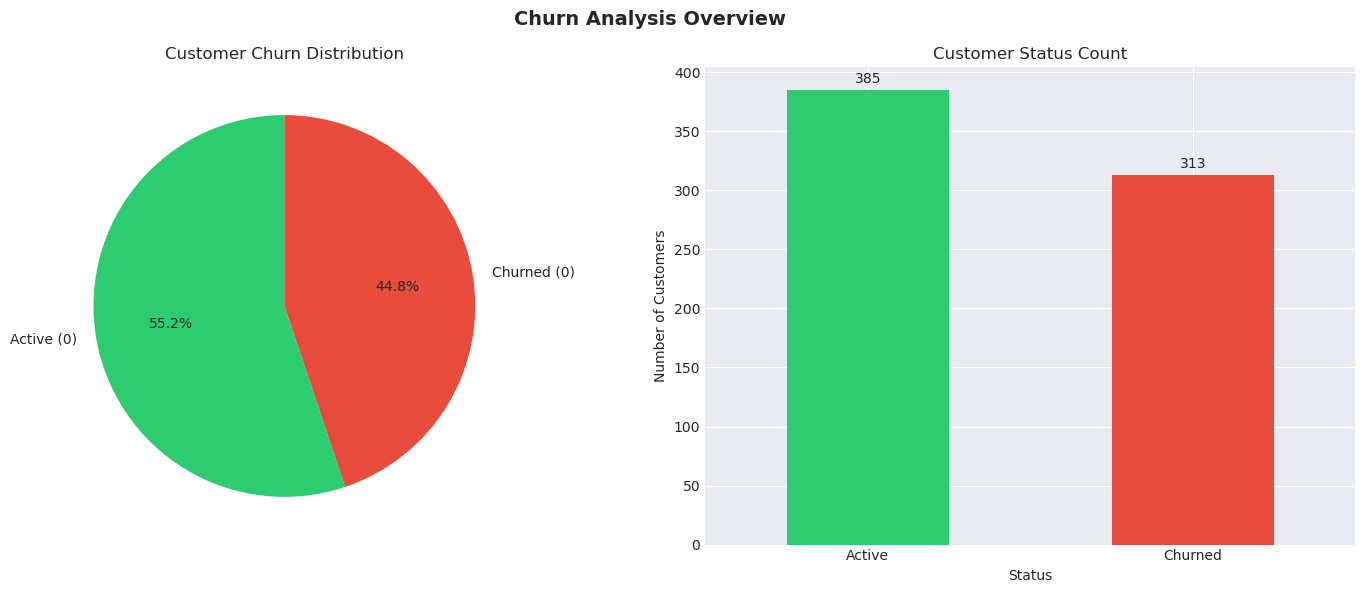

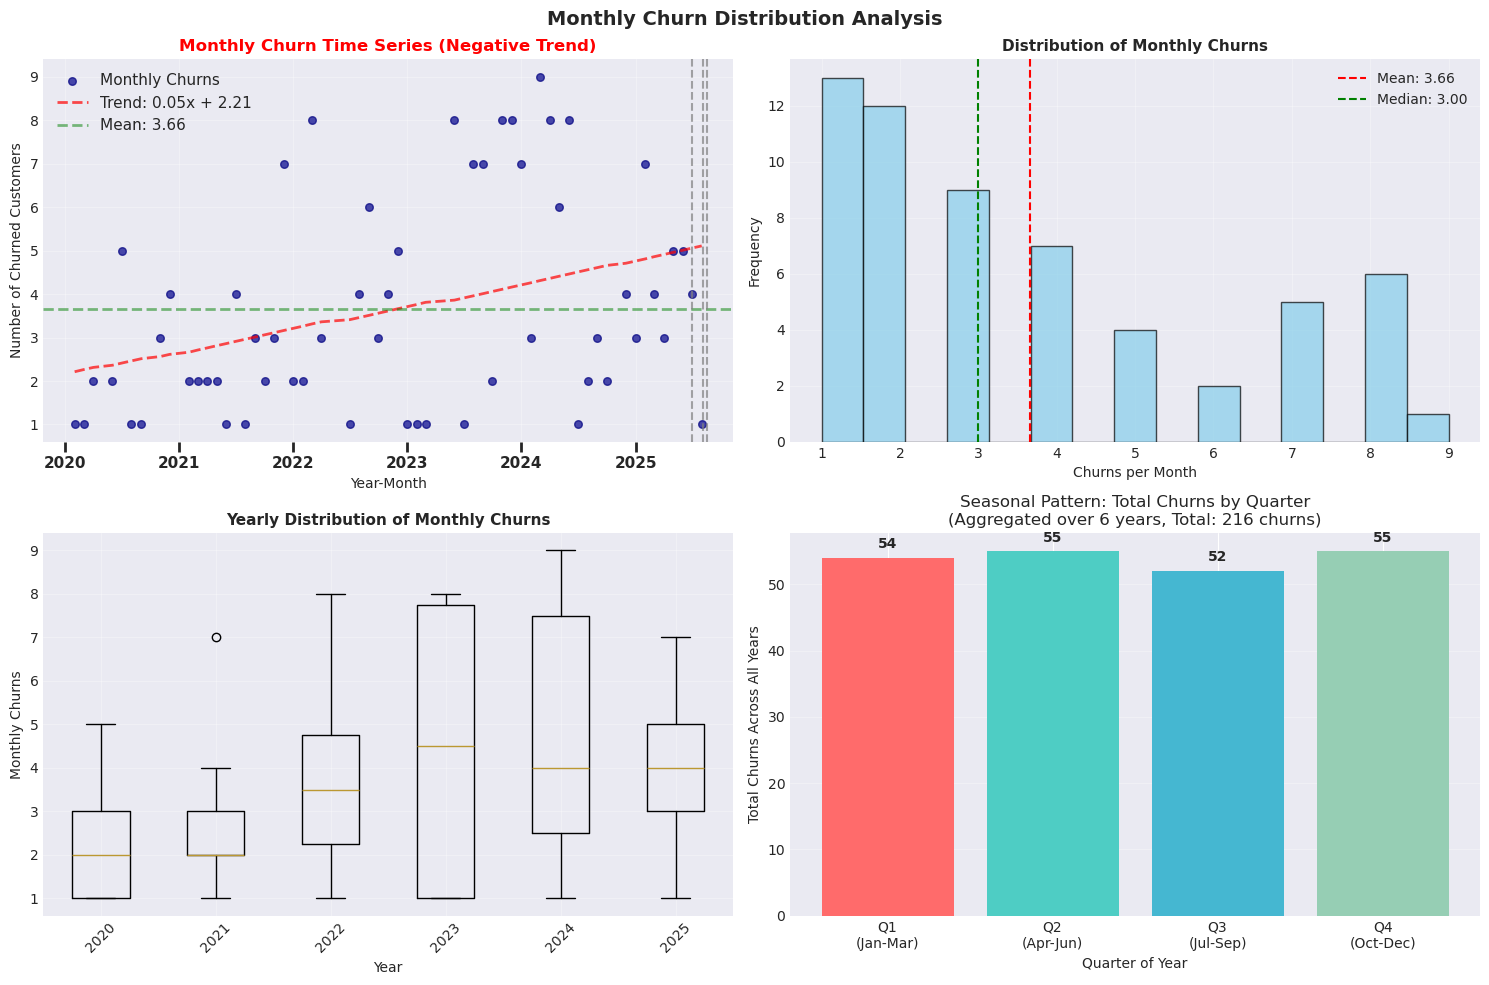

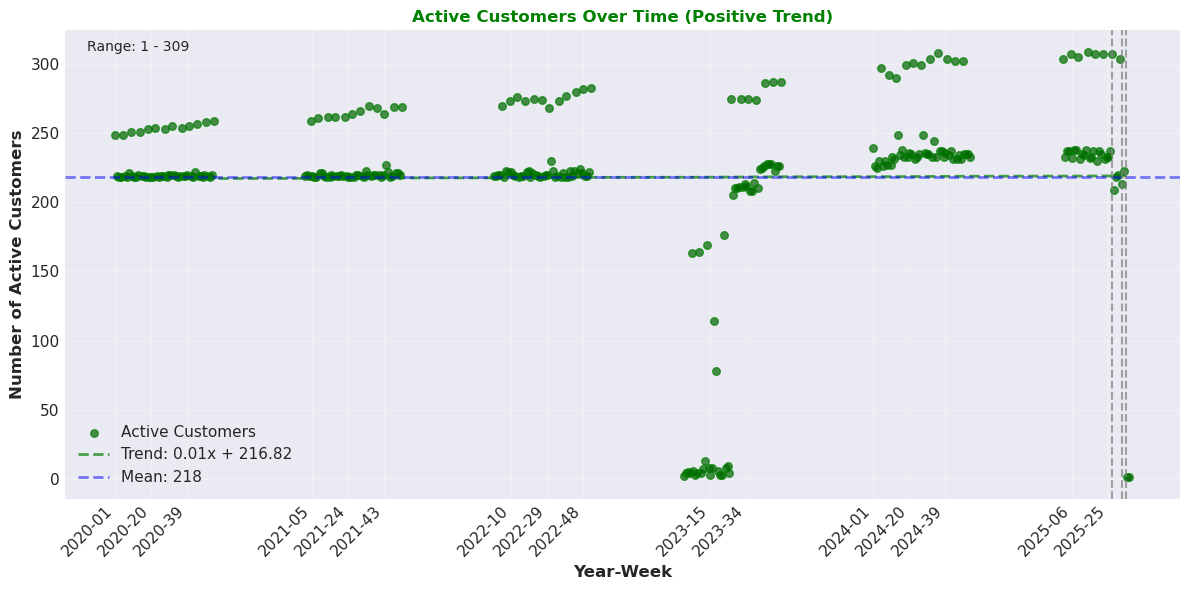

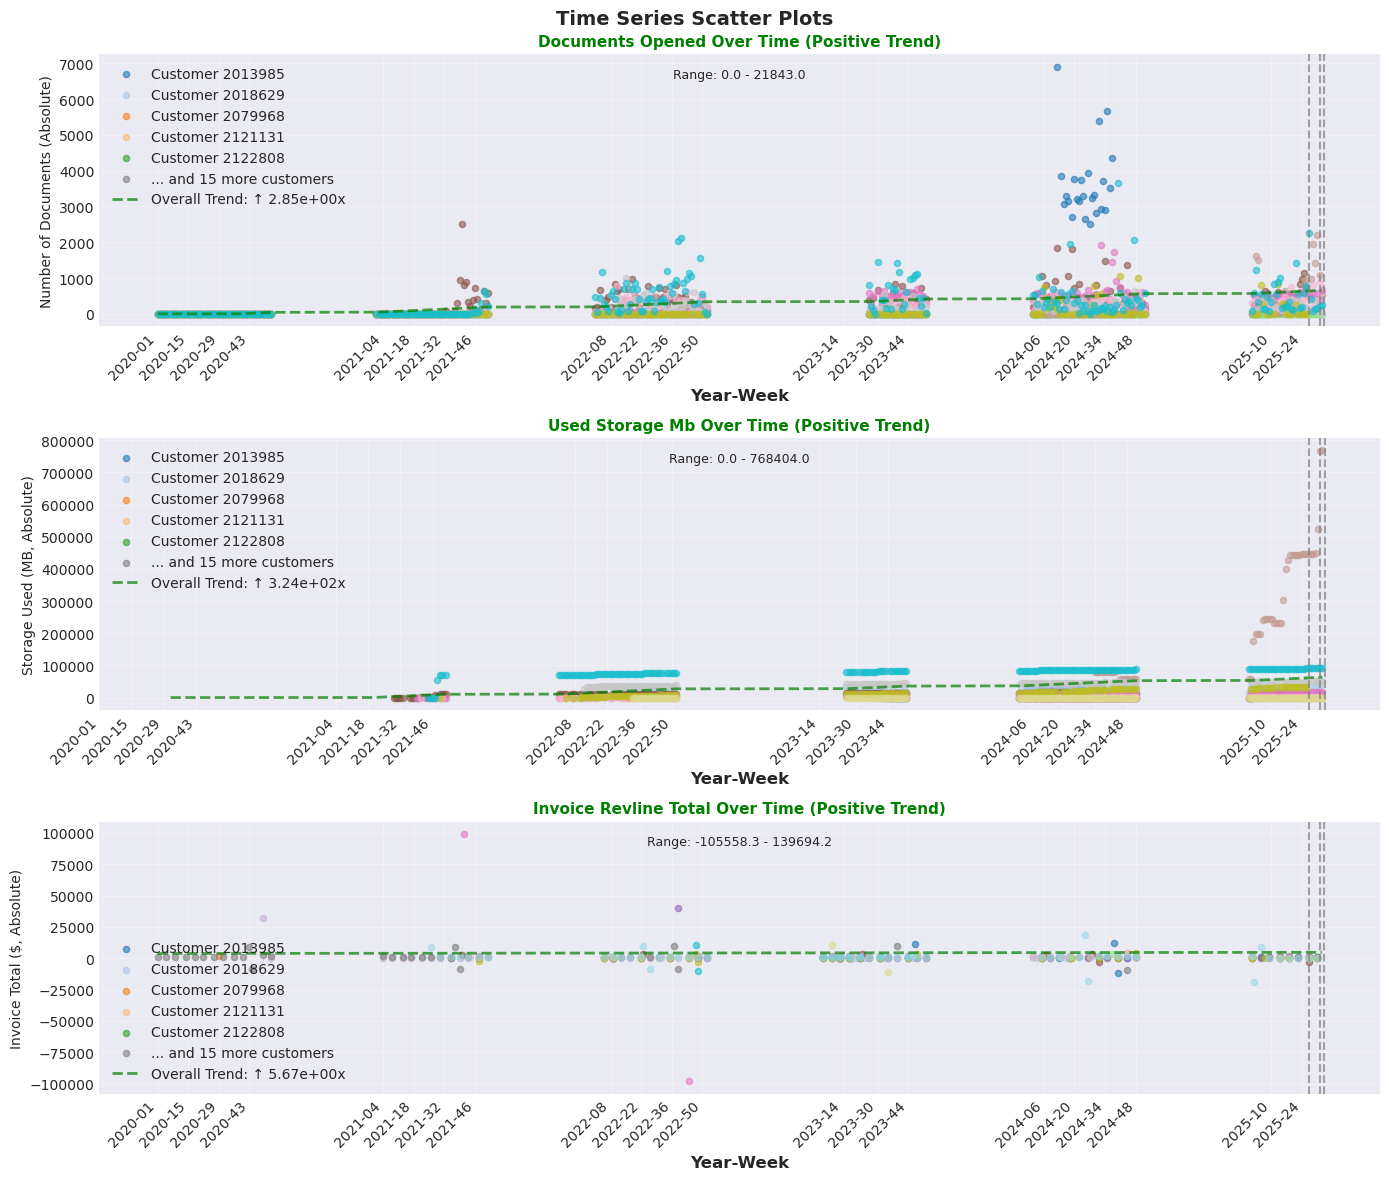

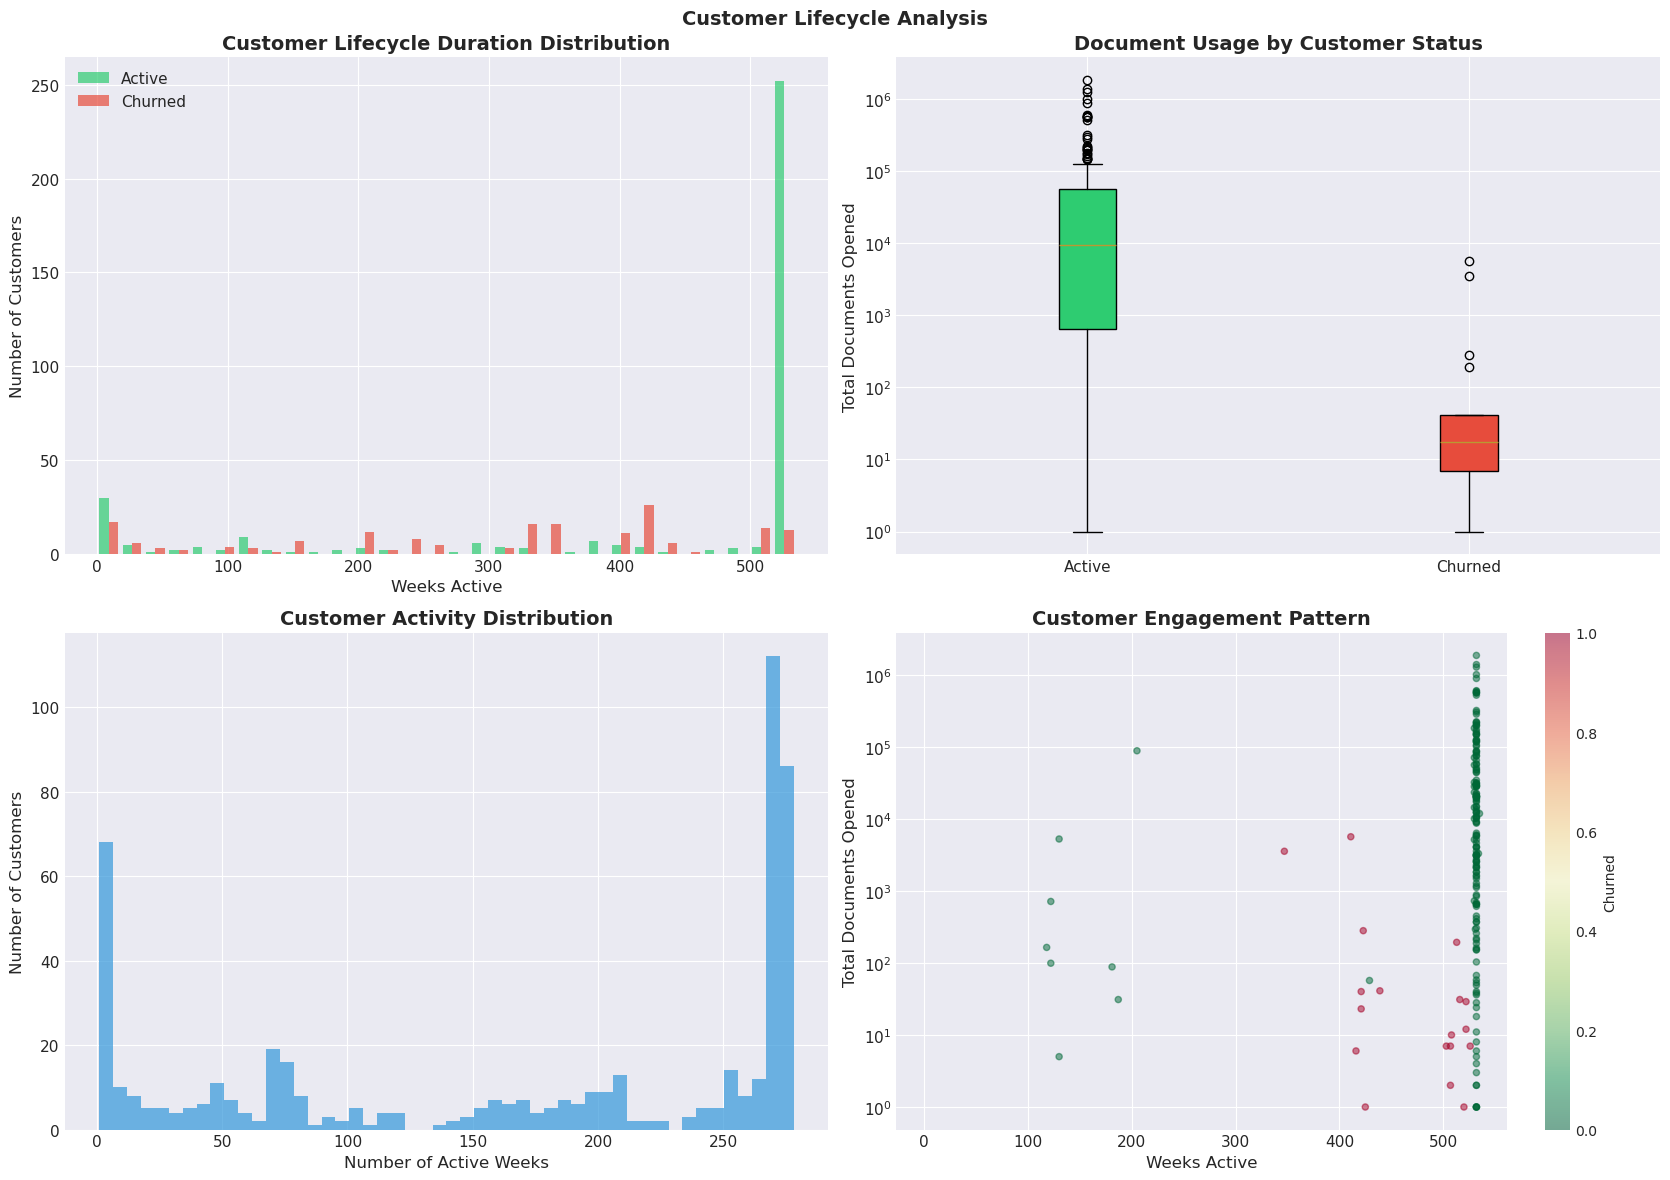

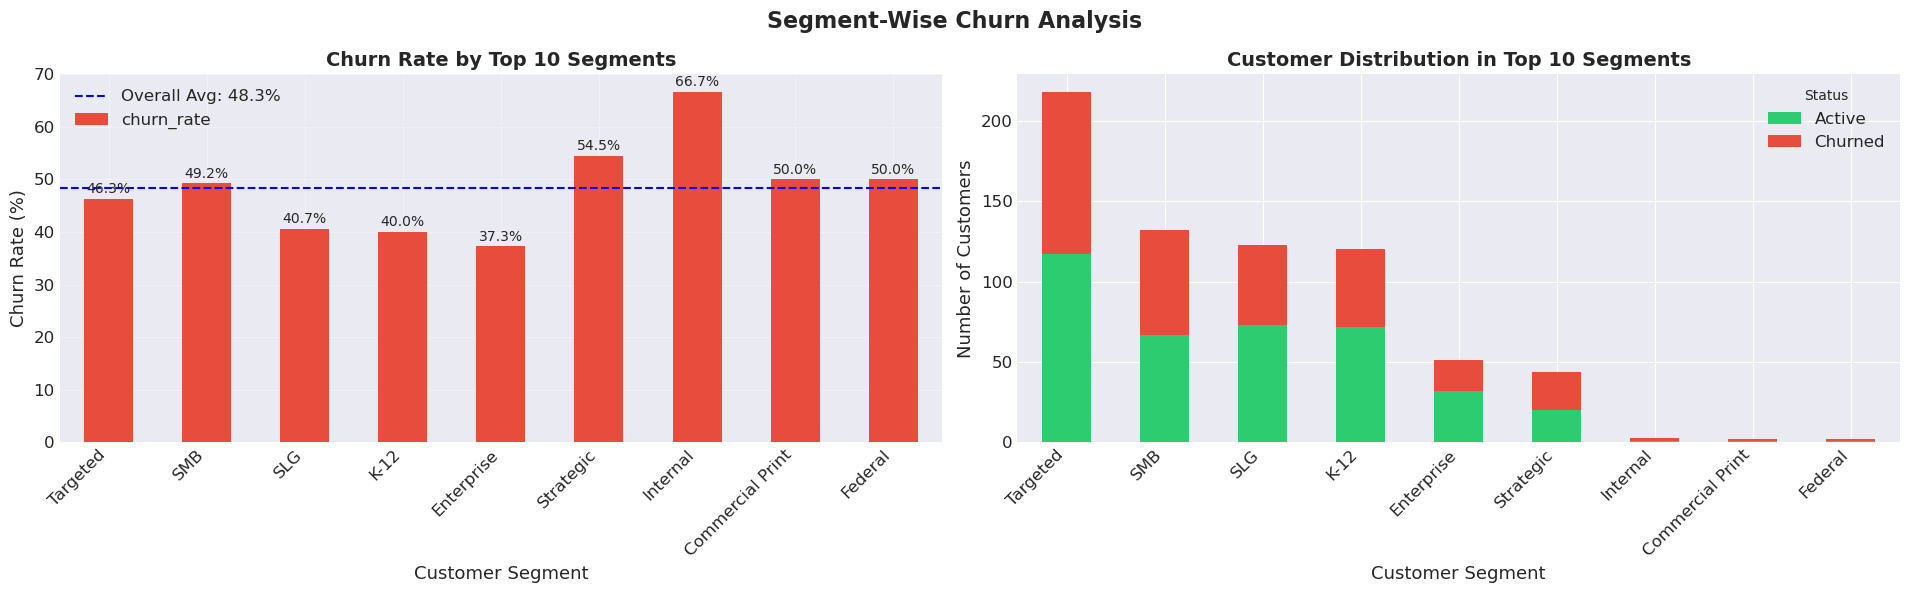

In [ ]:
# Generate comprehensive visualizations
print("\n" + "=" * 80)
print("GENERATING COMPREHENSIVE VISUALIZATIONS")
print("=" * 80)

logger.info("Creating comprehensive visualizations using ChurnLifecycleVizSnowflake")

# Initialize visualization class
viz = ChurnLifecycleVizSnowflake(figsize_scale=1.2)

# Generate all distribution plots
figures = viz.plot_all_distributions(
    data_dict=data_dict,
    churn_dist=churn_dist,
    save_dir=None  # Don't save in interactive mode
)

print(f"\n✅ Generated {len(figures)} visualization figures:")
for fig_name in figures.keys():
    print(f"   - {fig_name}")

print("\n📊 Figures are displayed in the plotting backend.")
print("   If running in Jupyter, plots should appear inline.")
print("   If running in terminal, check your matplotlib backend settings.")